In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [85]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [86]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [87]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train_catdog = []
X_test_catdog = []

y_train_catdog = []
y_test_catdog = []

for i in range(len(X_train)):
    if (y_train[i][0] == 5 or y_train[i][0] == 3): 
        X_train_catdog.append(X_train[i])
        y_train_catdog.append(0 if (y_train[i][0] == 3) else 1)

for i in range(len(X_test)):
    if (y_test[i][0] == 5 or y_test[i][0] == 3): 
        X_test_catdog.append(X_test[i])
        y_test_catdog.append(0 if (y_test[i][0] == 3) else 1)

X_train_catdog = np.array(X_train_catdog)
X_test_catdog = np.array(X_test_catdog)
y_train_catdog = np.array(y_train_catdog)
y_test_catdog = np.array(y_test_catdog)

print(X_train_catdog.shape, X_test_catdog.shape)
print(y_train_catdog.shape, y_test_catdog.shape)

pd.DataFrame(y_train_catdog)

gen = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

augment_ratio = 1.5
augment_size = int(augment_ratio * X_train_catdog.shape[0])

randidx = np.random.randint(X_train_catdog.shape[0], size=augment_size)

X_augmented = X_train_catdog[randidx].copy()
y_augmented = y_train_catdog[randidx].copy()

X_augmented, y_augmented = gen.flow(X_augmented, y_augmented, batch_size=augment_size, shuffle=False).next()

X_train_catdog = np.concatenate((X_train_catdog, X_augmented))
y_train_catdog = np.concatenate((y_train_catdog, y_augmented))

s = np.arange(X_train_catdog.shape[0])
np.random.shuffle(s)

X_train_catdog = X_train_catdog[s]
y_train_catdog = y_train_catdog[s]

(10000, 32, 32, 3) (2000, 32, 32, 3)
(10000,) (2000,)


In [88]:
X_train_catdog = X_train_catdog.astype("float32")
X_test_catdog = X_test_catdog.astype("float32")
y_train_catdog = pd.get_dummies(y_train_catdog)
y_test_catdog = pd.get_dummies(y_test_catdog)
X_train_catdog /= 255
X_test_catdog /= 255

In [89]:
print("Shape of Training Data: ")
print(X_train_catdog.shape)
print(y_train_catdog.shape)
print("Shape of Test Data: ")
print(X_test_catdog.shape)
print(y_test_catdog.shape)

Shape of Training Data: 
(25000, 32, 32, 3)
(25000, 2)
Shape of Test Data: 
(2000, 32, 32, 3)
(2000, 2)


In [90]:
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import SGD

model = Sequential([
    Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(48, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(2, activation="softmax"),
])

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=sgd)

/Users/kimtaeyoon/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [91]:
history = model.fit(X_train_catdog, y_train_catdog, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 11s 17ms/step - loss: 0.6889 - accuracy: 0.5394 - val_loss: 0.6767 - val_accuracy: 0.5866
Epoch 2/25
625/625 [==============================] - 11s 17ms/step - loss: 0.6710 - accuracy: 0.5839 - val_loss: 0.6508 - val_accuracy: 0.6182
Epoch 3/25
625/625 [==============================] - 10s 16ms/step - loss: 0.6473 - accuracy: 0.6245 - val_loss: 0.6369 - val_accuracy: 0.6314
Epoch 4/25
625/625 [==============================] - 10s 16ms/step - loss: 0.6249 - accuracy: 0.6467 - val_loss: 0.6033 - val_accuracy: 0.6784
Epoch 5/25
625/625 [==============================] - 10s 16ms/step - loss: 0.6031 - accuracy: 0.6714 - val_loss: 0.6019 - val_accuracy: 0.6640
Epoch 6/25
625/625 [==============================] - 9s 15ms/step - loss: 0.5879 - accuracy: 0.6842 - val_loss: 0.5769 - val_accuracy: 0.6952
Epoch 7/25
625/625 [==============================] - 9s 15ms/step - loss: 0.5778 - accuracy: 0.6920 - val_loss: 0.5627 - val_accuracy: 0

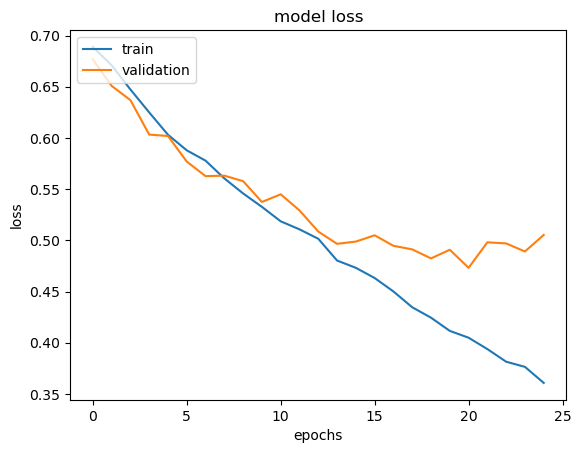

In [94]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [96]:
score = model.evaluate(X_test_catdog, y_test_catdog, batch_size=128, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.48674169182777405, 0.7730000019073486]


In [132]:
pred = model.predict(X_test_catdog)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
print(np.argmax(pred, axis=1))
y_test_catdog

63/63 [==============================] - 0s 5ms/step
[0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 

,0,1
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,1,0
